# COMP 9130 - Week 4: Unsupervised Learning
## Student Starter Template

**Names:** Binger Yu

**Date:** 2026-01-29

---

## Business Context

You are a data scientist at a wholesale distributor with 440 customers. The company wants to:
- **Segment customers** into meaningful groups for targeted delivery and marketing
- **Visualize** high-dimensional customer behavior patterns
- **Identify unusual customers** who may be VIPs, errors, or require special attention

**Dataset:** UCI Wholesale Customers Dataset
- **Features:** Annual spending (in monetary units) on Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen
- **Additional info:** Channel (Horeca/Retail), Region
- **Size:** 440 customers

---

## Learning Objectives

By the end of this session, you will:
1. Apply K-means clustering and determine optimal K using elbow method and silhouette scores
2. Compare PCA, t-SNE, and UMAP for dimensionality reduction
3. Implement anomaly detection using Isolation Forest
4. Interpret unsupervised learning results in business context

---

## 📌 Important Notes

- **Pair Programming:** Switch driver/navigator roles every 15 minutes
- **Analysis Questions:** Answer based on YOUR specific results (not generic responses)
- **Visualization Functions:** Provided for you - focus on interpretation
- **Cheatsheet:** Keep the Week 4 Quick Reference open during class!

---

## Setup: Import Libraries

Run this cell first to import all necessary libraries.

In [27]:
%pip install seaborn scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Note: UMAP requires: pip install umap-learn
try:
    import umap
    UMAP_AVAILABLE = True
except ImportError:
    print("UMAP not available. Install with: pip install umap-learn")
    print("You can skip UMAP and focus on PCA and t-SNE.")
    UMAP_AVAILABLE = False

# Anomaly Detection
from sklearn.ensemble import IsolationForest

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

UMAP not available. Install with: pip install umap-learn
You can skip UMAP and focus on PCA and t-SNE.
✓ All libraries imported successfully!


## Data Loading and Initial Exploration

We'll load the UCI Wholesale Customers dataset. The cell below tries multiple methods automatically:
1. From course GitHub repository (if available)
2. Download from UCI ML Repository
3. Direct URL download

In [29]:
# ===== AUTOMATIC DATA LOADING =====
# This cell tries multiple methods to get the dataset

import os

def load_wholesale_data():
    """
    Try multiple methods to load the Wholesale Customers dataset.
    """
    filename = 'wholesale_customers.csv'

    # Method 1: Check if file already exists locally
    if os.path.exists(filename):
        print(f"✓ Found '{filename}' in current directory")
        df = pd.read_csv(filename)
        print(f"✓ Loaded successfully! Shape: {df.shape}")
        return df

    # Method 2: Try UCI ML Repository
    print("🔄 Attempting to download from UCI ML Repository...")
    try:
        import subprocess
        subprocess.run(['pip', 'install', '-q', 'ucimlrepo'], check=True)
        from ucimlrepo import fetch_ucirepo

        wholesale_customers = fetch_ucirepo(id=292)
        df = wholesale_customers.data.features
        print(f"✓ Downloaded from UCI! Shape: {df.shape}")
        # Save locally
        df.to_csv(filename, index=False)
        print(f"✓ Saved as '{filename}'")
        return df
    except Exception as e:
        print(f"  UCI download failed: {e}")

    # Method 3: Direct URL (backup)
    print("🔄 Attempting direct URL download...")
    try:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
        df = pd.read_csv(url)
        print(f"✓ Downloaded directly! Shape: {df.shape}")
        # Save locally
        df.to_csv(filename, index=False)
        print(f"✓ Saved as '{filename}'")
        return df
    except Exception as e:
        print(f"  Direct download failed: {e}")

    # All methods failed
    print("\n" + "="*60)
    print("❌ MANUAL DOWNLOAD REQUIRED")
    print("="*60)
    print("\nPlease download manually:")
    print("1. Go to: https://archive.ics.uci.edu/dataset/292/wholesale+customers")
    print("2. Click 'Download' button")
    print("3. Save as 'wholesale_customers.csv'")
    print("4. Upload to your notebook environment")
    print("5. Re-run this cell")
    return None

# Load the data
df = load_wholesale_data()

if df is not None:
    print(f"\n{'='*60}")
    print("📊 DATASET LOADED SUCCESSFULLY!")
    print(f"{'='*60}")
    print(f"\nDataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nFirst few rows:")
    display(df.head())
else:
    print("\n⚠️  Please download the dataset manually and re-run this cell.")

✓ Found 'wholesale_customers.csv' in current directory
✓ Loaded successfully! Shape: (440, 7)

📊 DATASET LOADED SUCCESSFULLY!

Dataset shape: (440, 7)
Columns: ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

First few rows:


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [30]:
# Check data types and missing values
print("Dataset Information:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()

Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB

Missing values:
Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Basic statistics:


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 🤔 Quick Check

**Q1:** Look at the basic statistics above. Why will we need to standardize the features before applying clustering and dimensionality reduction?

**Your Answer:**

Looking at the basic statistics, we need to standardize the features because they are on completely different scales.

For example, the Channel column only ranges from 1 to 2, while the Fresh category has values as high as 112,151. Since K-means and PCA rely on calculating distances between points, the features with much larger raw numbers (like Fresh and Grocery) would "overpower" the smaller ones. Without scaling, the algorithm would treat a small change in food spending as more important than a total change in the distribution channel, leading to biased clusters that don't represent the whole picture.

## Prepare Features for Analysis

We'll focus on the 6 spending columns for our unsupervised learning tasks.
Channel and Region are categorical and will be kept separately for reference.

In [31]:
# Define the feature columns (spending categories)
feature_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Extract features for analysis
X = df[feature_cols].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Features: {feature_cols}")

Feature matrix shape: (440, 6)
Features: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


---

# Task 1: Customer Segmentation with K-Means (5 points)

**Goal:** Group customers into meaningful clusters based on their spending patterns.

**Steps:**
1. Standardize features
2. Use elbow method to determine optimal K
3. Calculate silhouette scores for different K values
4. Choose optimal K and fit final model
5. Analyze cluster characteristics
6. Provide business interpretation

---

## Step 1.1: Standardize Features

**Why?** K-means uses Euclidean distance, which is sensitive to feature scales.

In [32]:
# TODO: Create a StandardScaler and fit_transform the features
# Store the result in X_scaled

scaler = StandardScaler()
X_scaled = scaler. fit_transform(X)

print(f"Scaled features shape: {X_scaled.shape}")
print(f"\nFirst few rows of scaled data:")
print(X_scaled[:5])

Scaled features shape: (440, 6)

First few rows of scaled data:
[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 [ 0.10011141 -0.62401993 -0.3929769   0.6871443  -0.49858822  0.09341105]
 [ 0.84023948 -0.05239645 -0.07935618  0.17385884 -0.23191782  1.29934689]]


## Step 1.2: Elbow Method - Find Optimal K

Try K values from 2 to 10 and plot the inertia (within-cluster sum of squares).

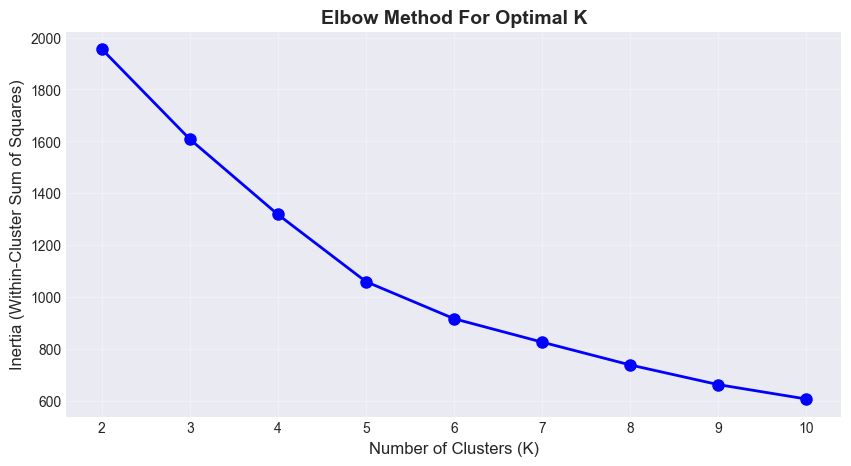

In [33]:
# TODO: Implement elbow method
# 1. Create empty list to store inertia values
# 2. Loop through K values from 2 to 10
# 3. For each K: fit KMeans and store inertia
# 4. Plot inertia vs K

inertia_values = []
K_range = range(2, 11)  # K from 2 to 10

for k in K_range:
    # Initialize KMeans with the current k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit the model to the scaled data
    kmeans.fit(X_scaled)
    # Append the inertia (wcss) to our list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.show()

## Step 1.3: Silhouette Score Analysis

Calculate silhouette scores for each K to validate the elbow method results.

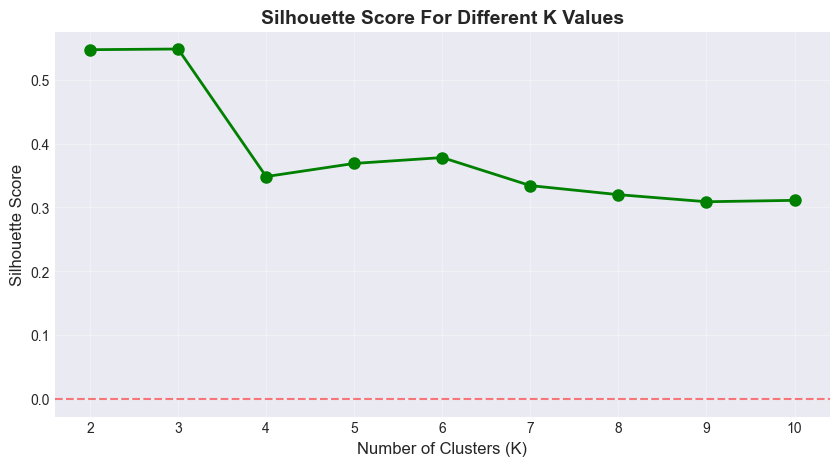


Silhouette Scores:
K=2: 0.547
K=3: 0.548
K=4: 0.348
K=5: 0.369
K=6: 0.378
K=7: 0.334
K=8: 0.320
K=9: 0.309
K=10: 0.311


In [34]:
# TODO: Calculate silhouette scores for K=2 to K=10
# Hint: Use silhouette_score(X_scaled, labels)

silhouette_scores = []

for k in K_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    # Calculate silhouette score
    score = silhouette_score(X_scaled, labels)
    # Append to our list
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score For Different K Values', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.show()

# Print the scores
print("\nSilhouette Scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: {score:.3f}")

### 🤔 Analysis Question 1.1

**Q2:** Based on the elbow curve and silhouette scores above, what value of K do you recommend? Justify your choice by referencing BOTH metrics.

**Your Answer:**

I choose k=3 because the elbow curve shows a noticeable drop in intertia from k=2 to k=3, with the curve beginning to level out slightly aftr that point. 
Also, the sihouette score is at its highest for k=3 (0.548) which is slightly better than k=2 (0.547). 

## Step 1.4: Fit Final K-Means Model

Use your chosen K to fit the final clustering model.

In [35]:
# TODO: Set your chosen K value here
optimal_k = 3

# TODO: Fit final K-means model with your chosen K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# YOUR CODE HERE - fit the model and get cluster labels

cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

print(f"✓ K-Means clustering completed with K={optimal_k}")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

✓ K-Means clustering completed with K=3

Cluster distribution:
Cluster
0     45
1    393
2      2
Name: count, dtype: int64


## Step 1.5: Visualize Clusters (Basic 2D View)

Visualize clusters using the first two features (we'll do better visualization in Task 2!).

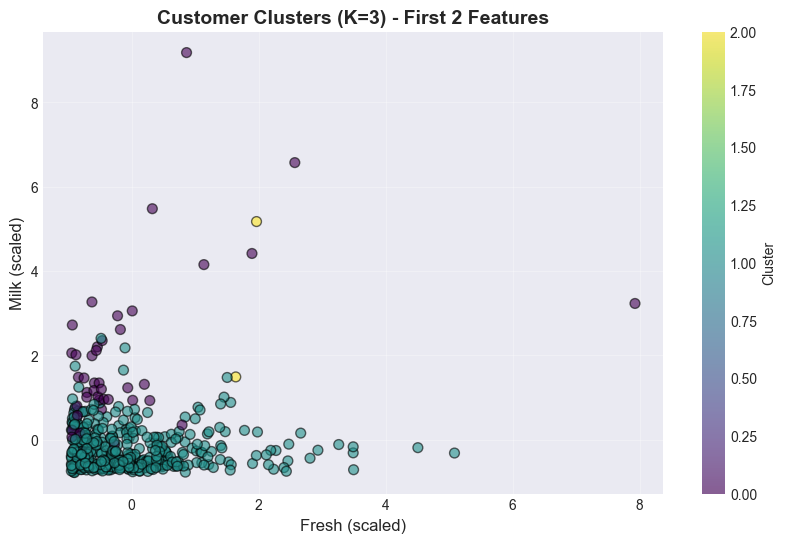

In [36]:
# Visualization helper function (PROVIDED)
def plot_clusters_2d(X, labels, feature_names, title="K-Means Clusters"):
    """
    Plot clusters using first two features.
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
                         alpha=0.6, edgecolors='k', s=50)
    plt.xlabel(f'{feature_names[0]} (scaled)', fontsize=12)
    plt.ylabel(f'{feature_names[1]} (scaled)', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot clusters
plot_clusters_2d(X_scaled, cluster_labels, feature_cols,
                title=f"Customer Clusters (K={optimal_k}) - First 2 Features")

## Step 1.6: Analyze Cluster Characteristics

Calculate mean spending for each cluster to understand what makes each cluster unique.

In [37]:
# TODO: Calculate mean spending for each cluster
# Group by cluster and calculate mean for each feature

cluster_means = df.groupby('Cluster')[feature_cols].mean()
# Hint: df.groupby('Cluster')[feature_cols].mean()

print("Mean Spending by Cluster:")
print(cluster_means)

# Calculate cluster sizes
print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())

Mean Spending by Cluster:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        10440.933333  19386.422222  28656.088889   2190.244444   
1        12062.913486   4115.099237   5534.966921   2940.676845   
2        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0            13327.800000   2374.200000  
1             1696.170483   1299.114504  
2              755.500000  26776.000000  

Cluster Sizes:
Cluster
0     45
1    393
2      2
Name: count, dtype: int64


## Step 1.7: Visualize Cluster Characteristics

Create a heatmap to see spending patterns across clusters.

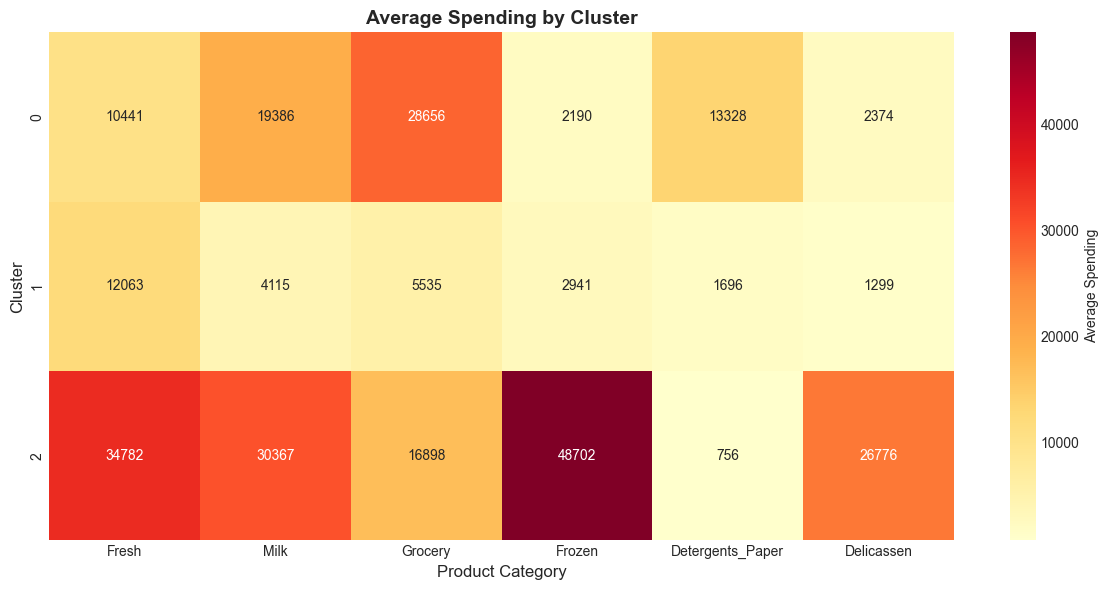

In [38]:
# TODO: Create a heatmap of cluster means
# Hint: Use sns.heatmap()

plt.figure(figsize=(12, 6))
# YOUR CODE HERE
sns.heatmap(cluster_means, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Average Spending'})

plt.title('Average Spending by Cluster', fontsize=14, fontweight='bold')
plt.ylabel('Cluster', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

### 🤔 Analysis Questions 1.2 - 1.4

**IMPORTANT:** Base your answers on YOUR specific cluster analysis above, not generic descriptions!

**Q3:** Looking at your cluster means heatmap, describe the spending pattern of each cluster. Which product categories does each cluster spend the most on?

**Your Answer:**

- **Cluster 0:** This group focuses heavily on Grocery (28656) and Milk (19386), along with the highest spending in Detergents_Paper (13328).
- **Cluster 1:** This is the largest group (393 customers) but has the lowest average spending across almost every ctegory, with their highest relative spending being on Fresh Products (12063).
- **Cluster 2:** This tiny group of only 2 customers are extreme outliers with massive spending in Frozen (48702), Fresh (34782), and Delicassen (26776).
- *[Add more clusters if needed]*

---

**Q4:** Give each cluster a meaningful business name based on their spending behavior (e.g., "High Fresh Spenders", "Grocery-Focused Retailers", etc.).

**Your Answer:**

- **Cluster 0:** Retailers
- **Cluster 1:** Small Cafes
- **Cluster 2:** Bulk Food Distributors
- *[Add more if needed]*

---

**Q5:** Recommend specific delivery or marketing strategies for at least TWO of your clusters. Be specific about why your recommendation fits that cluster's spending pattern.

**Your Answer:**

- **Cluster 0 (Retailers):** I recommend a subscription-based loyalty program for non-perishables. Since they spend heavily on Detergents_Paper and Grocery, offering bulk discounts or automated monthly re-stocking for these long-shelf-life items would fit their high-volume purchasing pattern.

- **Cluster 1 (Small Cafes):** I recommend a "Fresh-Daily" premium delivery service. Since their primary spending is on Fresh goods but their overall volume is low, they likely need smaller, more frequent deliveries to maintain quality without needing large storage space.

---

# ✅ Task 1 Complete!

Before moving to Task 2, make sure you have:
- [ ] Elbow curve plotted
- [ ] Silhouette scores calculated and plotted
- [ ] Chosen and justified your K value
- [ ] Fit final K-means model
- [ ] Analyzed cluster characteristics with heatmap
- [ ] Answered all analysis questions (Q2-Q5) with YOUR specific results
- [ ] Named clusters and provided business recommendations

**Call instructor to check your work for Task 1 assessment!**

---

---

# Task 2: Visualizing Customer Space with Dimensionality Reduction (5 points)

**Goal:** Reduce 6-dimensional spending data to 2D for visualization while preserving structure.

**Techniques:**
1. **PCA** - Linear method, preserves global structure
2. **t-SNE** - Non-linear, preserves local neighborhoods
3. **UMAP** - Non-linear, preserves both local and global structure (optional if installation issues)

We'll color the visualizations by the clusters we found in Task 1!

---

## Step 2.1: Principal Component Analysis (PCA)

PCA finds directions of maximum variance in the data.

In [39]:
# TODO: Apply PCA to reduce to 2 components
# 1. Create PCA object with n_components=2
# 2. Fit and transform the scaled data
# 3. Store result in X_pca

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA result shape: {X_pca.shape}")
print(f"\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

PCA result shape: (440, 2)

Explained variance ratio:
PC1: 0.441
PC2: 0.284
Total variance explained: 0.725


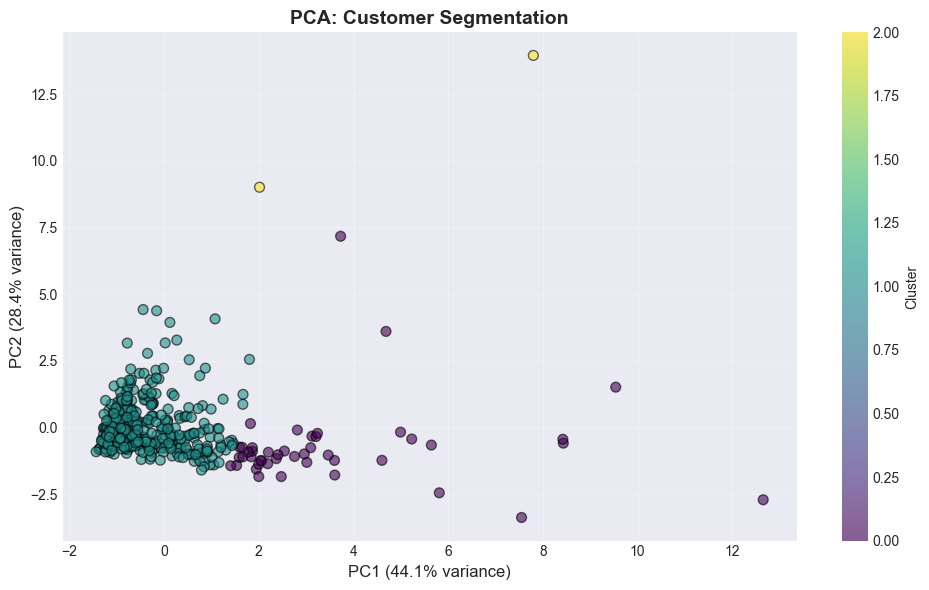

In [40]:
# Visualize PCA results colored by clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
                     cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA: Customer Segmentation', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 🤔 Analysis Question 2.1

**Q6:** What percentage of the total variance is captured by the first two principal components? Is this a good representation of the original 6-dimensional data?

**Your Answer:**

The first two principal components capture 72.5% of the total variance in the dataset. Specifically, PC1 explains 44.1% and PC2 explains 28.4%.
This is a strong representation of the oritinl 6-dimensional spending data. Capturing nearly three-quarters of the data's "information" or "spread" in just two dimensions is generally sufficient for visualization purposes. It allows us to clearly see the global structure of the customer segments, such as the distinct separation of the high-spending outliers while only losing about 27.5% of the original detail.

## Step 2.2: t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is great for visualizing clusters but doesn't preserve global distances.

**Note:** t-SNE can take 30-60 seconds to run. Be patient!

In [41]:
# TODO: Apply t-SNE
# 1. Create TSNE object with n_components=2, perplexity=30, random_state=42
# 2. Fit and transform the scaled data
# 3. Store result in X_tsne

print("Running t-SNE (this may take 30-60 seconds)...")

# 1. Create t-SNE object (perplexity 30 is a good starting point)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# 2. Fit and transform the scaled data
X_tsne = tsne.fit_transform(X_scaled)

print(f"✓ t-SNE completed! Result shape: {X_tsne.shape}")

Running t-SNE (this may take 30-60 seconds)...
✓ t-SNE completed! Result shape: (440, 2)


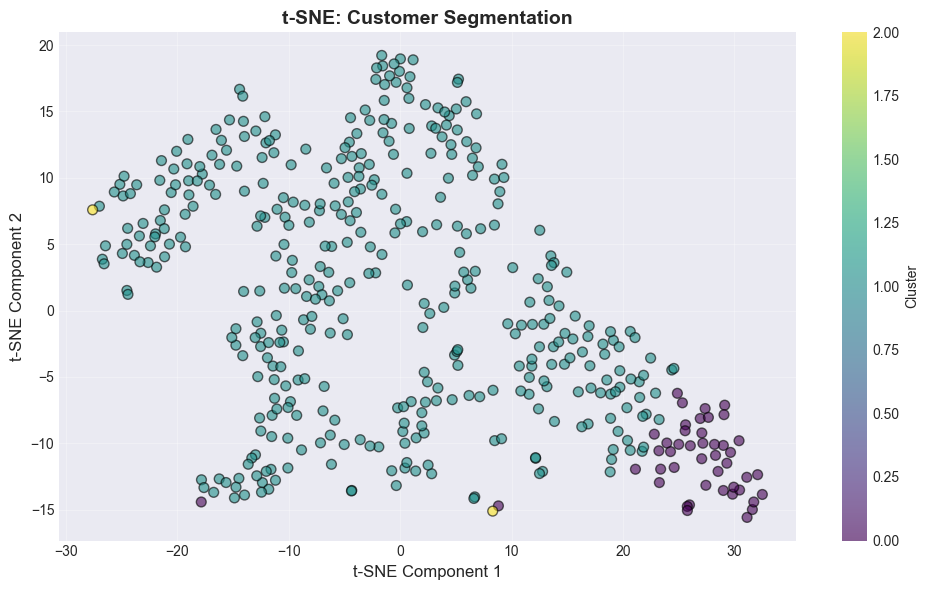

In [42]:
# Visualize t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels,
                     cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('t-SNE: Customer Segmentation', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 2.3: UMAP (Uniform Manifold Approximation and Projection) - OPTIONAL

UMAP is similar to t-SNE but faster and often preserves more global structure.

**If UMAP installation fails, skip this section - you can still get full credit with PCA + t-SNE!**

In [43]:
# TODO: Apply UMAP (if available)
if UMAP_AVAILABLE:
    print("Running UMAP...")

    # YOUR CODE HERE
    reducer = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)

    print(f"✓ UMAP completed! Result shape: {X_umap.shape}")

    # Visualize UMAP results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels,
                         cmap='viridis', alpha=0.6, edgecolors='k', s=50)
    plt.xlabel('UMAP Component 1', fontsize=12)
    plt.ylabel('UMAP Component 2', fontsize=12)
    plt.title('UMAP: Customer Segmentation', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("UMAP not available - skipping. This is OK, you can still get full credit!")

UMAP not available - skipping. This is OK, you can still get full credit!


## Step 2.4: Side-by-Side Comparison

Let's compare all methods side by side.

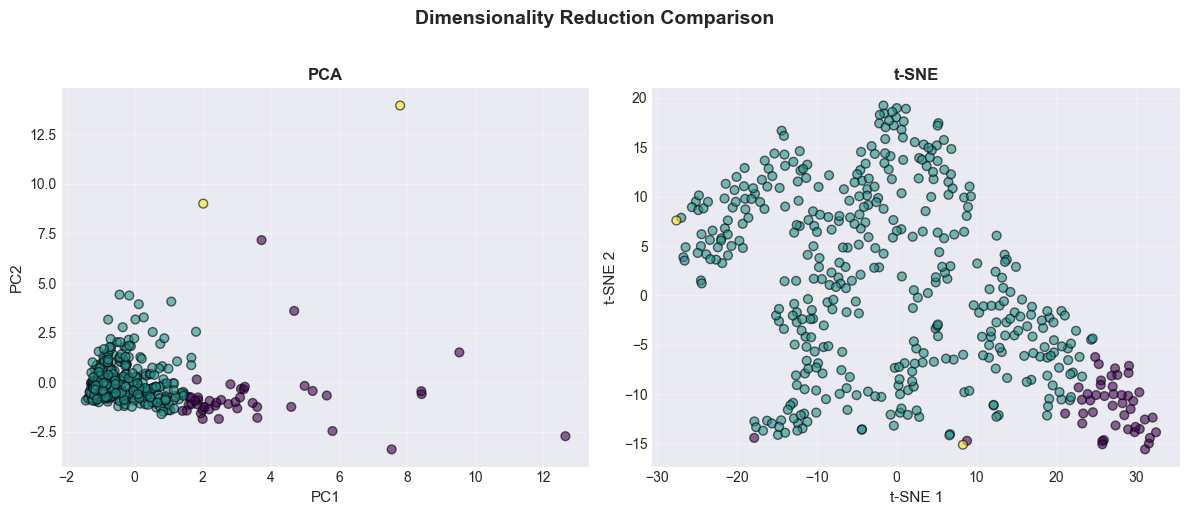

In [44]:
# Create comparison plot
n_plots = 3 if UMAP_AVAILABLE else 2
fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 5))

if n_plots == 2:
    axes = [axes[0], axes[1]]

# PCA plot
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
                          cmap='viridis', alpha=0.6, edgecolors='k', s=40)
axes[0].set_xlabel('PC1', fontsize=11)
axes[0].set_ylabel('PC2', fontsize=11)
axes[0].set_title('PCA', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# t-SNE plot
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels,
                          cmap='viridis', alpha=0.6, edgecolors='k', s=40)
axes[1].set_xlabel('t-SNE 1', fontsize=11)
axes[1].set_ylabel('t-SNE 2', fontsize=11)
axes[1].set_title('t-SNE', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# UMAP plot (if available)
if UMAP_AVAILABLE:
    scatter3 = axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels,
                              cmap='viridis', alpha=0.6, edgecolors='k', s=40)
    axes[2].set_xlabel('UMAP 1', fontsize=11)
    axes[2].set_ylabel('UMAP 2', fontsize=11)
    axes[2].set_title('UMAP', fontsize=12, fontweight='bold')
    axes[2].grid(True, alpha=0.3)

plt.suptitle('Dimensionality Reduction Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 🤔 Analysis Questions 2.2 - 2.4

**Q7:** Compare the three (or two) dimensionality reduction techniques. Do your K-means clusters appear as well-separated groups in all visualizations? Which method shows the clearest cluster separation?

**Your Answer:**

The clusters are not equally well separated in all visualizations.

In the PCA plot, most customers overlap in a dense central region, and only the extreme high-spending customers stand out alone. Cluster 2 (the 2 yellow outliers) is visible, bu clusters 0 and 1 still ovelap. This is because PCA is linear and focuses on capturing variance, not necessarity separating groups.

IN the t-SNE plot, the clusters appear more separated. The large low-to-moderate spenders form a broad structure, while the small extreme cluster is clearly pushed away from the rest. t-SNE preserves local neighborhood structure, so customers with similar spending patterns are grouped more tightly.

Overall, t-SNE shows the clearest cluster separation, especially for identifying the extreme high-spending customers.

---

**Q8:** PCA is linear while t-SNE and UMAP are non-linear. Based on your visualizations, does the customer data seem to have linear or non-linear structure? Explain your reasoning.

**Your Answer:**

The customer data appears to have non-linear structure.

If the structure were mostly linear, PCA would separate the clusters clearly. However, in the PCA visualization, mahy points overlap and form a compressed cloud. This suggests that a simple linear projection can not fully capture the relationships.

In contrast, t-SNE spreads the customers into more distinct regions and reveals patterns that PCA hides. This indicateds that customer spending relationships are complex and non-linear due to different combinations of product category spending rather than simple linear trends.

So, the better separation in t-SNE suggests the data has meaningful non-linear structure.

---

**Q9:** If you had to present customer segments to business executives, which visualization would you choose and why?

**Your Answer:**

I would present the t-SNE visualization to business executives.

t-SNE provides clearer visual separation between customer segments, making it easier to explain differences between groups. Excutives usually prefer intuitive visuals, and t-SNE shows natural groupings and highlights the extreme high-value customers clearly.

While PCA is more mathmematically interpretable, its overlapping clusters are harder for non-technical stakeholders to understand. t-SNE gives a more visually compelling story about customer segmentation. Therefore, t-SNE is better for communication and decision-making.

---

# ✅ Task 2 Complete!

Before moving to Task 3, make sure you have:
- [ ] PCA implemented with explained variance reported
- [ ] t-SNE implemented and visualized
- [ ] UMAP implemented (or reasonably attempted)
- [ ] All visualizations colored by cluster labels
- [ ] Side-by-side comparison created
- [ ] Answered all analysis questions (Q6-Q9)

**Call instructor to check your work for Task 2 assessment!**

---

---

# Task 3: Finding Unusual Customers with Anomaly Detection (5 points)

**Goal:** Identify customers with unusual spending patterns who may require special attention.

**Approach:** Use Isolation Forest algorithm

**Business Questions:**
- Are these anomalies VIP customers spending much more than average?
- Are they data entry errors?
- Are they unusual in specific product categories?
- What action should the business take?

---

## Step 3.1: Implement Isolation Forest

Start with contamination=0.1 (expecting 10% anomalies).

In [45]:
# TODO: Apply Isolation Forest
# 1. Create IsolationForest object with contamination=0.1, random_state=42
# 2. Fit on scaled data
# 3. Predict anomalies (returns -1 for anomaly, 1 for normal)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
# YOUR CODE HERE - fit and predict
iso_forest.fit(X_scaled)

anomaly_labels = iso_forest.predict(X_scaled)

# Add anomaly labels to dataframe
df['Anomaly'] = anomaly_labels

# Count anomalies
n_anomalies = (anomaly_labels == -1).sum()
n_normal = (anomaly_labels == 1).sum()

print(f"✓ Anomaly detection completed!")
print(f"\nResults:")
print(f"Normal customers: {n_normal} ({n_normal/len(df)*100:.1f}%)")
print(f"Anomalies detected: {n_anomalies} ({n_anomalies/len(df)*100:.1f}%)")

✓ Anomaly detection completed!

Results:
Normal customers: 396 (90.0%)
Anomalies detected: 44 (10.0%)


## Step 3.2: Experiment with Different Contamination Values

Try contamination=0.05 and 0.15 to see how it affects results.

In [46]:
# TODO: Try different contamination values
contamination_values = [0.05, 0.10, 0.15]

print("Testing different contamination values:\n")
for cont in contamination_values:
    
    # Create IsolationForest
    iso = IsolationForest(contamination=cont, random_state=42)
    
    # Fit and predict
    labels = iso.fit_predict(X_scaled)
    
    # Count anomalies
    n_anom = (labels == -1).sum()
    
    print(f"Contamination={cont}: {n_anom} anomalies ({n_anom/len(df)*100:.1f}%)")

Testing different contamination values:

Contamination=0.05: 22 anomalies (5.0%)
Contamination=0.1: 44 anomalies (10.0%)
Contamination=0.15: 66 anomalies (15.0%)


### 🤔 Analysis Question 3.1

**Q10:** Based on your experiments, which contamination value do you think is most appropriate for this dataset? Justify your choice.

**Your Answer:**

I think contamination=0.1 is most appropriate.

With 0.05, the model detects very few anomalies and may miss genuinely unusual high-spending customers. With 0.15, too many customers are flagged, including many that look similar to normal customers, which reduces usefulness.

Contamination = 0.10 provides a balanced result. It identifies a reasonable number of unusual customers without over-labeling normal behavior. For a wholesale business, expecting around 10% unusual customers is realistic since only a small portion are true VIPs or abnormal cases.

Therefore, 0.10 gives the best trade-off between sensitivity and practicality.

## Step 3.3: Visualize Anomalies on Dimensionality Reduction Plots

Let's see where anomalies appear in our PCA and t-SNE visualizations.

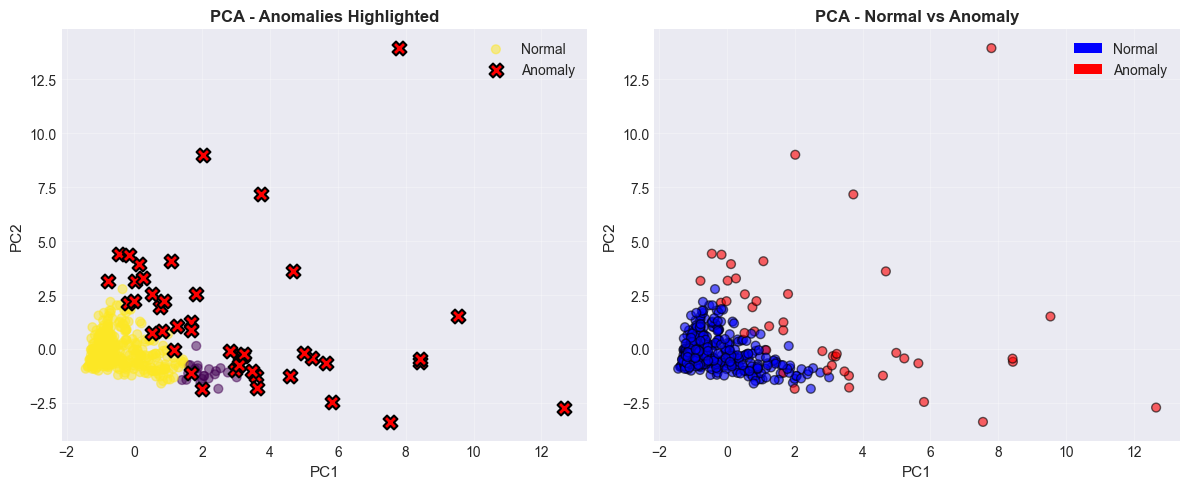

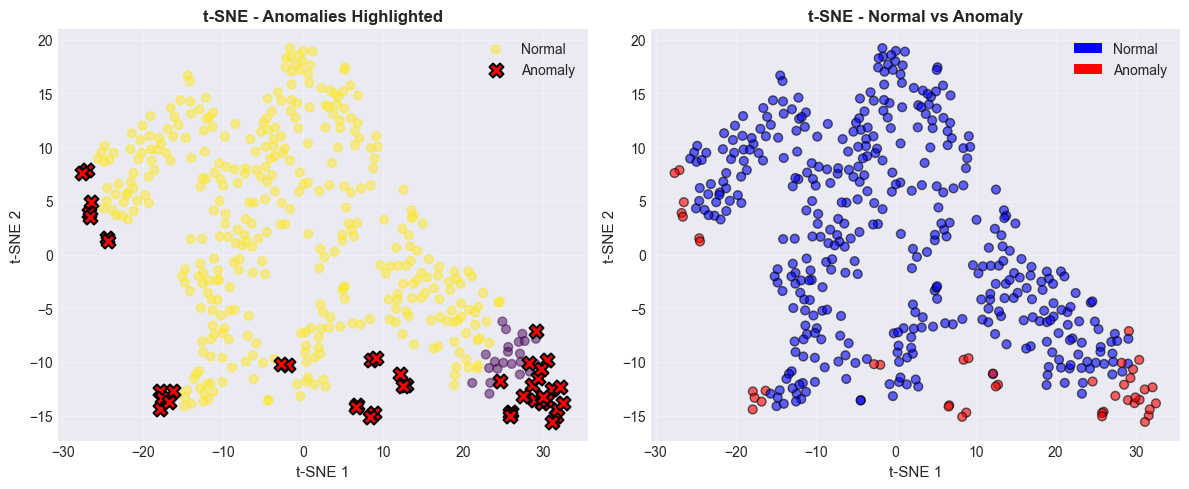

In [47]:
# Visualization helper function (PROVIDED)
def plot_anomalies(X_reduced, anomaly_labels, cluster_labels, title, xlabel, ylabel):
    """
    Plot dimensionality reduction with anomalies highlighted.
    """
    plt.figure(figsize=(12, 5))

    # Plot 1: Colored by clusters, anomalies marked with X
    plt.subplot(1, 2, 1)
    normal_mask = anomaly_labels == 1
    anomaly_mask = anomaly_labels == -1

    plt.scatter(X_reduced[normal_mask, 0], X_reduced[normal_mask, 1],
               c=cluster_labels[normal_mask], cmap='viridis',
               alpha=0.5, s=40, label='Normal')
    plt.scatter(X_reduced[anomaly_mask, 0], X_reduced[anomaly_mask, 1],
               c='red', marker='X', s=100, edgecolors='black',
               linewidths=1.5, label='Anomaly')
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.title(f'{title} - Anomalies Highlighted', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Just anomaly status
    plt.subplot(1, 2, 2)
    colors = ['blue' if x == 1 else 'red' for x in anomaly_labels]
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
               c=colors, alpha=0.6, s=40, edgecolors='k')
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.title(f'{title} - Normal vs Anomaly', fontsize=12, fontweight='bold')

    # Custom legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='blue', label='Normal'),
                      Patch(facecolor='red', label='Anomaly')]
    plt.legend(handles=legend_elements)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Visualize on PCA
plot_anomalies(X_pca, anomaly_labels, cluster_labels, 'PCA', 'PC1', 'PC2')

# Visualize on t-SNE
plot_anomalies(X_tsne, anomaly_labels, cluster_labels, 't-SNE', 't-SNE 1', 't-SNE 2')

## Step 3.4: Characterize the Anomalies

Let's understand what makes these customers unusual.

Spending Comparison: Anomalies vs Normal Customers
                        Normal       Anomaly    Difference
Fresh             10839.732323  22445.386364  11605.654040
Milk               4346.300505  18845.954545  14499.654040
Grocery            6256.878788  23200.863636  16943.984848
Frozen             2504.542929   8178.431818   5673.888889
Detergents_Paper   2161.555556   9360.931818   7199.376263
Delicassen         1107.222222   5283.704545   4176.482323


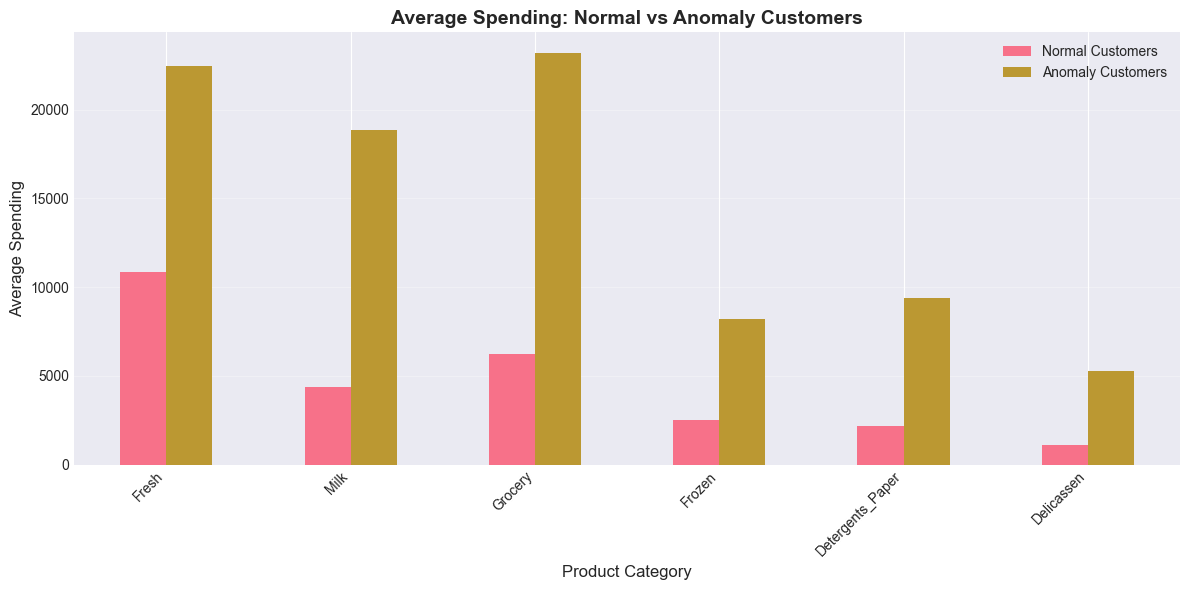

In [48]:
# TODO: Compare spending patterns of anomalies vs normal customers
# Calculate mean spending for normal customers and anomalies separately

normal_customers = df[df['Anomaly'] == 1]
anomaly_customers = df[df['Anomaly'] == -1]

# YOUR CODE HERE - calculate means
normal_means = normal_customers[feature_cols].mean()
anomaly_means = anomaly_customers[feature_cols].mean()

# Create comparison dataframe
comparison = pd.DataFrame({
    'Normal': normal_means,
    'Anomaly': anomaly_means,
    'Difference': anomaly_means - normal_means
})

print("Spending Comparison: Anomalies vs Normal Customers")
print(comparison)

# Visualize comparison
comparison[['Normal', 'Anomaly']].plot(kind='bar', figsize=(12, 6))
plt.title('Average Spending: Normal vs Anomaly Customers', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Normal Customers', 'Anomaly Customers'])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [49]:
# TODO: Look at specific anomalous customers
# Display top 5 anomalies (you can sort by different criteria)
# Add total spending column (temporary)
anomaly_customers['Total_Spending'] = anomaly_customers[feature_cols].sum(axis=1)

# Sort by highest spending
top_anomalies = anomaly_customers.sort_values(
    by='Total_Spending',
    ascending=False
)

print("Top 5 Highest-Spending Anomalies:")
print(top_anomalies[feature_cols + ['Cluster', 'Total_Spending']].head(5))

print("Sample of Anomalous Customers:")
print(anomaly_customers[feature_cols + ['Cluster']].head(10))

Top 5 Highest-Spending Anomalies:
      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster  \
85    16117  46197    92780    1026             40827        2944        0   
47    44466  54259    55571    7782             24171        6465        0   
181  112151  29627    18148   16745              4948        8550        0   
183   36847  43950    20170   36534               239       47943        2   
61    35942  38369    59598    3254             26701        2017        0   

     Total_Spending  
85           199891  
47           192714  
181          190169  
183          185683  
61           165881  
Sample of Anomalous Customers:
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
2    6353   8808     7684    2405              3516        7844        1
22  31276   1917     4469    9408              2381        4334        1
23  26373  36423    22019    5154              4337       16523        0
24  22647   9776    13792    2915         

## Step 3.5: Cluster Distribution of Anomalies

Which clusters do most anomalies come from?

Cluster Distribution of Anomalies:
Cluster
0    23
1    19
2     2
Name: count, dtype: int64


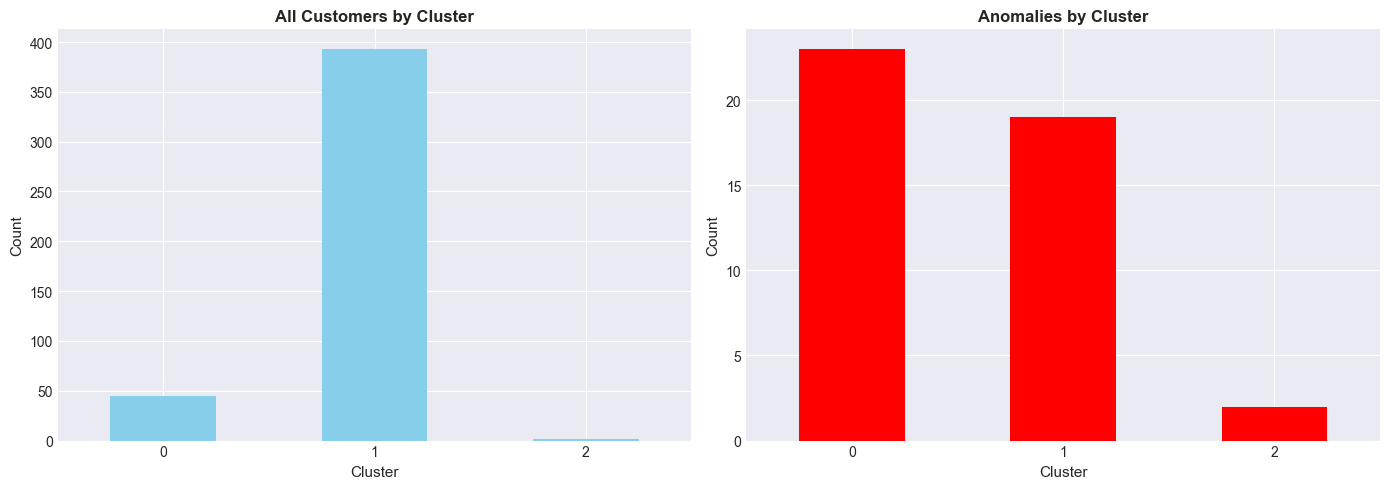

In [50]:
# TODO: Analyze cluster distribution of anomalies
print("Cluster Distribution of Anomalies:")
print(anomaly_customers['Cluster'].value_counts().sort_index())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# All customers by cluster
df['Cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('All Customers by Cluster', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].tick_params(axis='x', rotation=0)

# Anomalies by cluster
anomaly_customers['Cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Anomalies by Cluster', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 🤔 Analysis Questions 3.2 - 3.5

**Q11:** Looking at the spending comparison chart, what makes the anomalous customers unusual? Are they high spenders, low spenders, or unusual in specific categories?

**Your Answer:**

The anomalous customers are mainly high spenders across all product categories.

From the comparison chart, anomalies spend significantly more than normal customers in Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen. The largest differences appear in Grocery and Milk.

This shows they are not just unusual in one category — they consistently purchase at much higher volumes. Therefore, most anomalies represent bulk or high-value customers, not low spenders.

---

**Q12:** Examine the specific anomalous customers shown above. Pick 2-3 examples and describe what makes each one unusual.

**Your Answer:**

- **Customer 47:** Extremely high spending in Fresh (44,466), Milk (54,259), and Grocery (55,571), along with very high Detergents_Paper. This customer purchases heavily across almost all categories, suggesting a major wholesale buyer or distributor.
- **Customer 61:** This customer spends extremely high amounts on Grocery and Detergents_Paper, along with high Fresh and Milk purchases, but relatively little on Frozen and Delicatessen. This pattern suggests a large retail store or supermarket focusing on staple goods and household supplies rather than specialty foods.
- **Customer 183:** This customer spends extremely high amounts on Fresh, Milk, Frozen, and Delicatessen, but almost nothing on Detergents_Paper. This unusual combination suggests a business focused purely on food (such as a restaurant, catering company, or specialty food provider) rather than a general retailer.

---

**Q13:** Looking at your cluster distribution analysis, which cluster(s) contain the most anomalies? Why might this be?

**Your Answer:**

Cluster 0 contains the most anomalies (23).

This cluster likely includes higher-spending or more variable customers. Because Isolation Forest detects points far from the average, customers in this cluster are more likely to be flagged when their spending becomes extreme.

So, the cluster already contains customers with larger purchases, making extreme cases easier to detect.

---

**Q14:** Based on your analysis, categorize your anomalies into different types (e.g., VIP customers, potential errors, seasonal businesses, etc.) and recommend specific business actions for each type.

**Your Answer:**

- **Type 1: VIP / High-Value Customers** - Customers with very high spending across many categories.
- Action: Offer loyalty programs, dedicated account managers, and bulk discounts.
- **Type 2: Bulk Retail Buyers** - Customers spending heavily on Grocery, Milk, and Detergents_Paper.
- Action: Provide wholesale contracts and scheduled large deliveries.
- *[Add more types if identified]*

---

**Q15:** In the visualizations, do anomalies appear at cluster boundaries or completely separated from all clusters? What does this tell you about their nature?

**Your Answer:**

In the PCA and t-SNE plots, anomalies appear mostly separated from the main clusters, rather than at boundaries.

This indicates they are truly different from normal customers. Their spending patterns are far from the average customer behavior, which confirms they represent special cases like VIP or bulk buyers instead of borderline customers.

---

# ✅ Task 3 Complete!

Make sure you have:
- [ ] Implemented Isolation Forest
- [ ] Tested multiple contamination values
- [ ] Visualized anomalies on PCA and t-SNE plots
- [ ] Analyzed spending patterns of anomalies vs normal
- [ ] Examined specific anomalous customers
- [ ] Analyzed cluster distribution of anomalies
- [ ] Answered all analysis questions (Q10-Q15)
- [ ] Provided business interpretation and recommendations

**Call instructor to check your work for Task 3 assessment!**

---

---

# 🎉 Session Complete!

## Summary of What You've Accomplished

Today you:
1. ✅ Segmented 440 customers using K-means clustering
2. ✅ Determined optimal K using elbow method and silhouette scores
3. ✅ Visualized 6D customer data in 2D using PCA, t-SNE, and UMAP
4. ✅ Identified unusual customers using Isolation Forest
5. ✅ Provided business interpretations and actionable recommendations

## Key Takeaways

- **No ground truth:** Unlike classification, unsupervised learning requires subjective evaluation
- **Scaling matters:** Distance-based methods are sensitive to feature scales
- **Multiple methods:** Different techniques reveal different patterns - use multiple approaches
- **Business context:** Technical results must translate to actionable business insights

---

## 📋 Mini Project 3 Preview

**Due:** Beginning of next week's class

**Requirements:**
- Use ALL three techniques (clustering, dimensionality reduction, anomaly detection)
- Choose your own dataset (can be different from today)
- LESS scaffolding - more independent decision-making
- Deep analysis and integration of techniques
- Justify ALL parameter choices
- Provide comprehensive business recommendations

**Deliverables:**
1. GitHub repository with clean code
2. Comprehensive README
3. Technical report (15 points)

**Start early!** This project requires more independent thinking than previous ones.

---

## 📚 Additional Resources

- Week 4 Quick Reference Cheatsheet (keep for Mini Project 3!)
- Class prep materials and videos
- Office hours: [Check D2L for schedule]

---

**Great work today! 🚀**